### About

In this very simple example, we would like to calculate the Higgs recoil mass on Higgsstrahlung events (e+e- ---> ZH) with Z->mumu.

### Data
Please download these files from [here](https://sas.desy.de/index.php/s/eBYsECq4sN6NGkP):
  * Signal: `E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root`
  * Background: `E250-TDR_ws.P4f_zz_sl.Gwhizard-1_95.eL.pR.I106575.001.edm4hep.root`
  
Create a folder called `data` in the root directory of this repository. Then put into separate foldes `signal`and `bgk`

### Imports

In [1]:
1+1

2

In [1]:
import ROOT
from ROOT import edm4hep
import numpy as np
import os
from os import listdir
import math

# from edm4hep_path import get_edm4hep_path
from podio.root_io import Reader

ROOT.gInterpreter.LoadFile('/cvmfs/sw.hsf.org/key4hep/releases/2024-03-10/x86_64-ubuntu22.04-gcc11.4.0-opt/edm4hep/0.10.5-4hlcr2'
+"/include/edm4hep/utils/kinematics.h")
USE_ENERGY=edm4hep.utils.detail.UseEnergyTag()

Welcome to JupyROOT 6.28/10


In [2]:
get_edm4hep_path = '/cvmfs/sw.hsf.org/key4hep/releases/2024-03-10/x86_64-ubuntu22.04-gcc11.4.0-opt/edm4hep/0.10.5-4hlcr2'


In [30]:
# filename = "/home/cinyu/ddfastshowerml2/scripts/CLD_dummyOutput_ML_Rot2_edm4hep.root"
filename_full = "/home/cinyu/ddfastshowerml2/scripts/CLD_geant4_010_edm4hep.root"
filename_fast = "/home/cinyu/ddfastshowerml2/scripts/CLD_fast_notracker010_edm4hep.root"
filename_fast = '/home/cinyu/ddfastshowerml2/scripts/CLD_fast_notracker1000_edm4hep.root'

In [31]:
reader = Reader(filename_fast)

MCmorethanone = 0
for i, event in enumerate(reader.get('events')):            
    # print(event) 
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    
    if len(pIDs) != 1:
        print(pIDs)
        MCmorethanone += 1
        continue


print("#events with more than one MC particles:",MCmorethanone, "out of", len(reader.get('events')))


[ 22  11 -11]
[ 22  11 -11]
[ 22  11 -11]
[ 22  11 -11]
[ 22  11 -11]
#events with more than one MC particles: 5 out of 1000


In [32]:
print(i)

999


### histograms

In [6]:
reader = Reader(filename_fast)

hist_energy = ROOT.TH1F("energy","cell energy hist",100,-2,2)

for i, event in enumerate(reader.get('events')):  
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hit = event.get("ECalBarrelCollection")
    energies = np.array(hit.energy())
    for energy in energies:
        hist_energy.Fill(np.log10(energy)+3) # emergy in MeV for comparisonbreak



In [7]:
reader = Reader(filename_full)

hist_energy2 = ROOT.TH1F("energy","cell energy hist",100,-2,2)

for i, event in enumerate(reader.get('events')):  
    if i == 50: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        # print(pIDs)
        continue
    hit = event.get("ECalBarrelCollection")
    energies = np.array(hit.energy())
    for energy in energies:
        hist_energy2.Fill(np.log10(energy)+3) # emergy in MeV for comparison



Warning in <TROOT::Append>: Replacing existing TH1: energy (Potential memory leak).


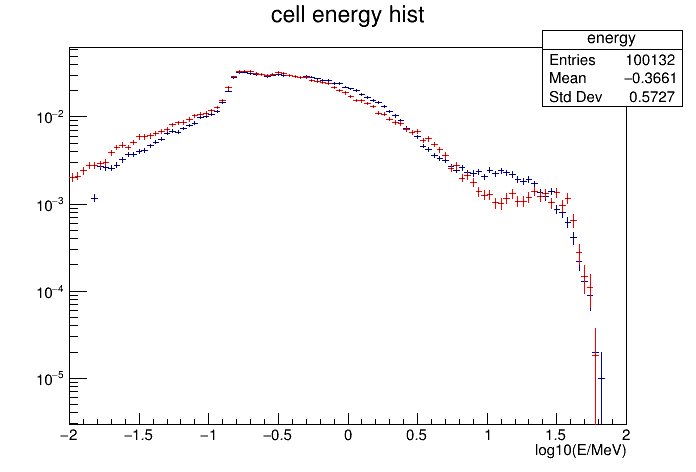

In [8]:
### Draw via ROOT
c1 = ROOT.TCanvas()
hist_energy.GetXaxis().SetTitle("log10(E/MeV)")
hist_energy.Scale(1/hist_energy.Integral())
hist_energy2.Scale(1/hist_energy2.Integral())
hist_energy2.SetLineColor(2)
hist_energy.Draw()
hist_energy2.Draw('SAME')
c1.SetLogy()
c1.Draw()


### hit position

In [57]:
reader = Reader(filename_fast)

hist_x = ROOT.TH1F("x","hit x",30,-240,240)

for i, event in enumerate(reader.get('events')): 
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hits = event.get("ECalBarrelCollection")
    for hit in hits:
        hist_x.Fill(hit.position().z)


Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).


In [58]:
reader = Reader(filename_full)

hist_x2 = ROOT.TH1F("x","hit x",30,-240,240)

for i, event in enumerate(reader.get('events')): 
    if i == 100: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hits = event.get("ECalBarrelCollection")
    for hit in hits:
        hist_x2.Fill(hit.position().z)

    

Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).


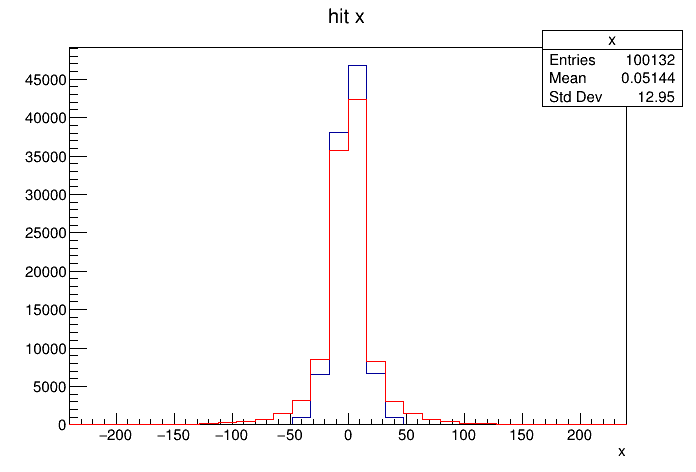

In [59]:
### Draw via ROOT
c1 = ROOT.TCanvas()
hist_x.GetXaxis().SetTitle("x")
hist_x2.SetLineColor(2)
hist_x.Draw()
hist_x2.Draw('SAME')
# c1.SetLogy()
c1.Draw()

### convert to mesh coordinates
convert the shower from global coordinals to alone the MC particle direction 

discretize coordinates

handle hits

rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 9
rrr 

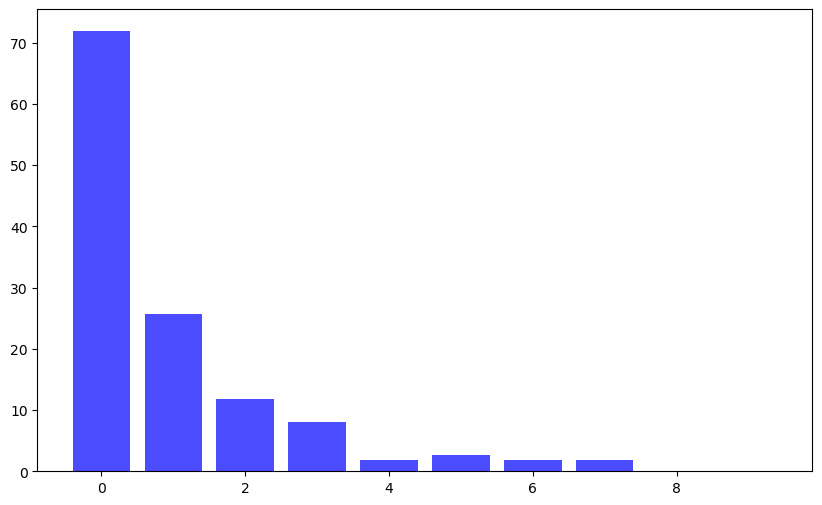

99


In [4]:
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt

reader = Reader(filename_fast)
nevent = 100
nCellsRho = 9 
nCellsPhi = 16  
nCellsZ = 45 
sizeOfRhoCells = 4.65 #mm
sizeOfZCells = 3.4 #mm
sizeOfPhiCells = 2 * np.pi/nCellsPhi # ? 16 phi cells therefore...
acturalnumber = 0

list = []
cell_ids = np.arange(nCellsRho+1)
energies = np.zeros(len(cell_ids))
meshshower = np.zeros((nevent, nCellsRho, nCellsPhi, nCellsZ))

for i, event in enumerate(reader.get('events')): 
    # print(i, particle_phi)
    if i == nevent: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    # not correct: todo calculate position from direction
    # entrancePosition = np.array([mcParticles[0].endpoint().x, mcParticles[0].endpoint().y, mcParticles[0].endpoint().z])
    entrancePosition = np.array([0, 2150, 0]) # only for direction 0 1 0
    entranceDirction = np.array([mcParticles[0].momentum().x, mcParticles[0].momentum().y, mcParticles[0].momentum().z] )
    # print(entranceDirction)
    
    # particle_r = np.linalg.norm(entranceDirction)
    # particle_theta = np.arccos(entranceDirction[2] / particle_r)
    # particle_phi = np.arctan2(entranceDirction[1], entranceDirction[0])

    # print(particle_theta, particle_phi)
    # print(particle_r, particle_theta, particle_phi) # 50 1.57 any
    # rotation matrix calculation
    # rot_matrix = R.from_euler('z', -particle_phi).as_matrix() @ R.from_euler('y', -particle_theta).as_matrix()
    # rot_matrix_inv = np.linalg.inv(rot_matrix)
    # print("rot_matrix \n", rot_matrix)
    # print(rot_matrix @ np.array([0, 1, 0])) #1,0,0

    hits = event.get("ECalBarrelCollection")
    hitsenergies= np.array(hits.energy())    
    # print(np.sum(hitsenergies))
    if np.isinf(hitsenergies).any(): continue
    # avoid big numbers and inf
    # hitsenergies[np.isinf(hitsenergies)] = 0
    # threshold = np.percentile(hitsenergies, 99)
    # print("threshold energy: ", threshold)
    # mask = hitsenergies >= threshold
    # hitsenergies[mask] = 0
    

    for j, hit in enumerate(hits):
        hitPosition = np.array([hit.position().x, hit.position().y, hit.position().z])
        delta = hitPosition - entrancePosition
        # calculate delta with respect to the cylinder around entrance direction + position
        localZ = np.dot(delta, entranceDirction)/np.linalg.norm(entranceDirction)
        localRho = np.sqrt(np.dot(delta, delta)-localZ*localZ)
        # print(np.linalg.norm(delta), localZ)

        # print(localRho)
        #calculate phi
        # proj = delta - entranceDirction/np.linalg.norm(entranceDirction)*localZ
        # randomdir = np.array([0,0,1])
        # sign = 1
        # if np.dot(np.cross(proj, randomdir), entranceDirction) < 0: 
        #     sign = -1 
        # localPhi = np.pi+np.arctan2(sign * np.linalg.norm(np.cross(proj, randomdir)), np.dot(proj, randomdir)) 
        
        # for now, just:
        # localPhi = np.pi+np.arctan2(delta[2], delta[0])
        # if delta[0] < 2: localPhi = np.random.rand()*2*np.pi
        localPhi = np.random.rand()*2*np.pi
        #######?????????##########
        
        # localPhi = np.arccos(np.dot(proj, randomdir)/localRho)
        
        # 
        # if math.isnan(localPhi): localPhi = 0
        # print(localPhi)
        
        
        #? define the direction of phi as ? # in this case (global theta == 90)0,0,1 always work
        # print(delta)
        # delta = rot_matrix_inv @ delta
        # print(delta)

        # Discretize coordinates
        rho_no = int(np.floor(localRho/sizeOfRhoCells))
        z_no = int(np.floor(localZ/sizeOfZCells))
        phi_no = int(np.floor(localPhi/sizeOfPhiCells))
        list.append(phi_no)
        # print(rho_no,z_no)

        # rho_no = int(np.floor(np.linalg.norm(delta[:2]) / sizeOfRhoCells))
        # phi_no = int(np.floor((np.pi + np.arctan2(delta[1], delta[0])) / sizeOfPhiCells))
        # z_no = int(np.floor(delta[2] / sizeOfZCells))
        # print(rho_no, phi_no, z_no, hitsenergies[j])
        # list.append(phi_no)
        if rho_no >= nCellsRho : print("rrr", rho_no); continue
        if phi_no >= nCellsPhi: print("ppp", phi_no); continue
        if z_no >= nCellsZ: print("zzz",z_no); continue
        if z_no<0: print("zzz",z_no); continue


        # print(localPhi, phi_no)
        energies[rho_no] += hitsenergies[j]
        meshshower[i,rho_no,phi_no,z_no] += hitsenergies[j]
    acturalnumber += 1

        
np.save("/home/cinyu/ddfastshowerml2/edm4hep_analysis/fastsim.npy", meshshower*1000) #as in MeV
print(energies)
plt.figure(figsize=(10, 6))
# plt.hist(list, color='blue', alpha=0.7, edgecolor='black')
plt.bar(cell_ids, energies, color='blue', alpha=0.7)
plt.show() 

np.array(list).max()
print(acturalnumber)


### plot important observables:
- longitutional profile
- radius profile 

In [5]:
reader = Reader(filename_fast)
nevent = 100

r_pos_fast = []
z_pos_fast = []
weight_energy_fast = []
valid_fast = 0

for i, event in enumerate(reader.get('events')): 
    if i == nevent: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    entrancePosition = np.array([0, 2150, 0]) # only for direction 0 1 0
    entranceDirction = np.array([mcParticles[0].momentum().x, mcParticles[0].momentum().y, mcParticles[0].momentum().z] )
    
    hits = event.get("ECalBarrelCollection")
    hitsenergies= np.array(hits.energy())    
    print(np.sum(hitsenergies))
    if np.isinf(hitsenergies).any(): continue

    
    for j, hit in enumerate(hits):
        hitPosition = np.array([hit.position().x, hit.position().y, hit.position().z])
        delta = hitPosition - entrancePosition
        localZ = np.dot(delta, entranceDirction)/np.linalg.norm(entranceDirction)
        localRho = np.sqrt(np.dot(delta, delta)-localZ*localZ)
        r_pos_fast.append(localRho)
        z_pos_fast.append(localZ)
        weight_energy_fast.append(hitsenergies[j])
    valid_fast += 1

1.2506019
1.2785289
1.3240652
1.2545682
1.2801986
1.2547321
1.3386902
1.2747991
1.2448213
1.3248427
1.3171663
1.2910028
1.3035578
1.3116951
1.2495937
1.2969296
1.3031806
1.2652884
1.2613212
1.2785245
1.2619667
1.3335865
1.272904
1.3080864
1.3213698
1.3244755
1.2609723
1.2958777
1.2385045
1.2449787
1.193442
1.2460045
1.2903221
1.2872397
1.2853656
1.2416408
1.3057243
1.2902315
1.2504022
1.3043064
1.297886
1.216111
1.2837932
1.2792903
1.3006117
1.31917
1.2008307
1.274874
inf
1.2449577
1.2239558
1.3049626
1.2692423
1.2660835
1.2594666
1.3007777
1.3237108
1.2902305
1.2536067
1.242037
1.2933793
1.2690942
1.1710156
1.286826
1.297221
1.3089089
1.2914178
1.236852
1.286857
1.250952
1.2581139
1.2944705
1.2319559
1.2790512
1.2733557
1.2641536
1.3006954
1.2833492
1.282054
1.258348
1.2685648
1.2130097
1.3267903
1.28766
1.1970947
1.29861
1.2585262
1.2895302
1.2877586
1.208953
1.2164274
1.2427667
1.2775354
1.2434924
1.2857237
1.2680022
1.2726538
1.2887897
1.245558
1.2895389


In [6]:
reader = Reader(filename_full)

r_pos_full = []
z_pos_full = []
weight_energy_full = []
valid_full = 0

for i, event in enumerate(reader.get('events')): 
    if i == nevent: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    entrancePosition = np.array([0, 2150, 0]) # only for direction 0 1 0
    entranceDirction = np.array([mcParticles[0].momentum().x, mcParticles[0].momentum().y, mcParticles[0].momentum().z] )
    
    hits = event.get("ECalBarrelCollection")
    hitsenergies= np.array(hits.energy())    
    print(np.sum(hitsenergies))
    if np.isinf(hitsenergies).any(): continue

    
    for j, hit in enumerate(hits):
        hitPosition = np.array([hit.position().x, hit.position().y, hit.position().z])
        delta = hitPosition - entrancePosition
        localZ = np.dot(delta, entranceDirction)/np.linalg.norm(entranceDirction)
        localRho = np.sqrt(np.dot(delta, delta)-localZ*localZ)
        r_pos_full.append(localRho)
        z_pos_full.append(localZ)
        weight_energy_full.append(hitsenergies[j])
    valid_full += 1

1.3292631
1.1666209
1.237752
1.327267
1.2957036
1.3714019
1.3327787
1.3533732
1.3307996
1.3260119
1.2873346
1.2721837
1.2697684
1.3134712
1.1920063
1.3381009
1.3169049
1.3077111
1.3094716
1.3309232
1.244859
1.3713841
1.3434432
1.320024
1.343893
1.3523024
1.2545974
1.3258381
1.330695
1.361877
1.2686732
1.3026268
1.3129789
1.3451399
1.3214475
1.3004991
1.3085204
1.3295574
1.3691385
1.2914135
1.3341751
1.3343341
1.3149498
1.3104368
1.3596282
1.3284397
1.3113586
1.3381629
1.3182611
1.3117727
1.034106
1.327806
1.2952193
1.3277808
1.3370026
1.2952099
1.3240331
1.3358928
1.3121529
1.3638628
1.3140785
1.3571761
1.2931602
1.3782924
1.2918375
1.3223574
1.2914357
1.2418301
1.3022275
1.3151891
1.320955
1.3376352
1.3106982
1.3432858
1.3331871
1.2114174
1.3449476
1.2686698
1.2978812
1.2986091
1.1862216
1.2739077
1.2937119
1.2884525
1.329162
1.3084934
1.3713827


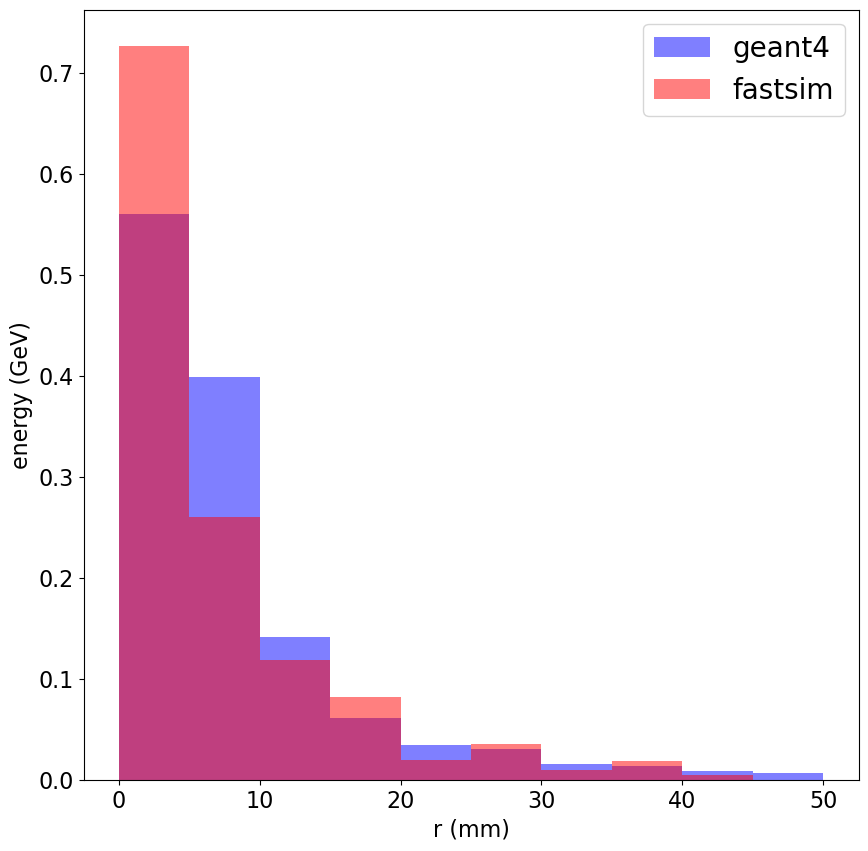

In [118]:
plt.figure(figsize=(10, 10))
plt.hist(r_pos_full,bins = 10, weights=np.array(weight_energy_full)/valid_full,range=(0, 50), color = 'blue', alpha = 0.5, label = 'geant4')
plt.hist(r_pos_fast,bins = 10, weights=np.array(weight_energy_fast)/valid_fast,range=(0, 50), color = 'red', alpha = 0.5, label = 'fastsim')
plt.legend(fontsize = 20)
plt.xlabel("r (mm)", fontsize = 16)
plt.ylabel("energy (GeV)", fontsize = 16)
plt.tick_params(axis='both', which = 'major', labelsize = 16)
# plt.hist(r_pos,weights=weight_energy,range=(0, 40))
# log_energy_fast = np.log10(np.array(weight_energy_fast))+3
# log_energy_full = np.log10(np.array(weight_energy_full))+3
# plt.hist(log_energy_full,bins = 100, range=(-2, 2), color = 'blue', alpha = 0.5) # todo change to log
# plt.hist(log_energy_fast,bins = 100, range=(-2, 2), color = 'red', alpha = 0.5) # todo change to log
# plt.yscale('log')
plt.savefig('/home/cinyu/figs/r_profile.png')
plt.show() 



In [52]:
print(meshshower.sum())
np.save("/home/cinyu/ddfastshowerml2/edm4hep_analysis/fastsim.npy", meshshower)
ss = np.load("/home/cinyu/ddfastshowerml2/edm4hep_analysis/fastsim.npy")


85.10142400371114


### full sim comparison

In [8]:
import h5py

In [20]:
# mesh full 
filename_mesh_full = "/home/cinyu/ddfastshowerml2/fullsim mesh.h5"
h5 = h5py.File(filename_mesh_full)
e_mesh_full = h5['showers'][:].astype(np.float32)
print(np.shape(e_mesh_full))
nevent = 100
e_mesh_full = e_mesh_full[:nevent, ...]/1000

r_pos_mesh = []
z_pos_mesh = []
weight_energy_mesh = []
valid_mesh = 0

for nevent in range(np.shape(e_mesh_full)[0]):
    event = e_mesh_full[nevent]

    # if valid_mesh == 100: break
    # print(np.shape(event))
    for nrho in range(9):
        for nphi in range(16):
            for nz in range(45):
                r_pos_mesh.append((nrho+0.5)*sizeOfRhoCells)
                z_pos_mesh.append((nz+0.5)*sizeOfZCells)
                weight_energy_mesh.append(event[nrho,nphi,nz])
    valid_mesh += 1
print(valid_mesh)
  

(926, 9, 16, 45)
100


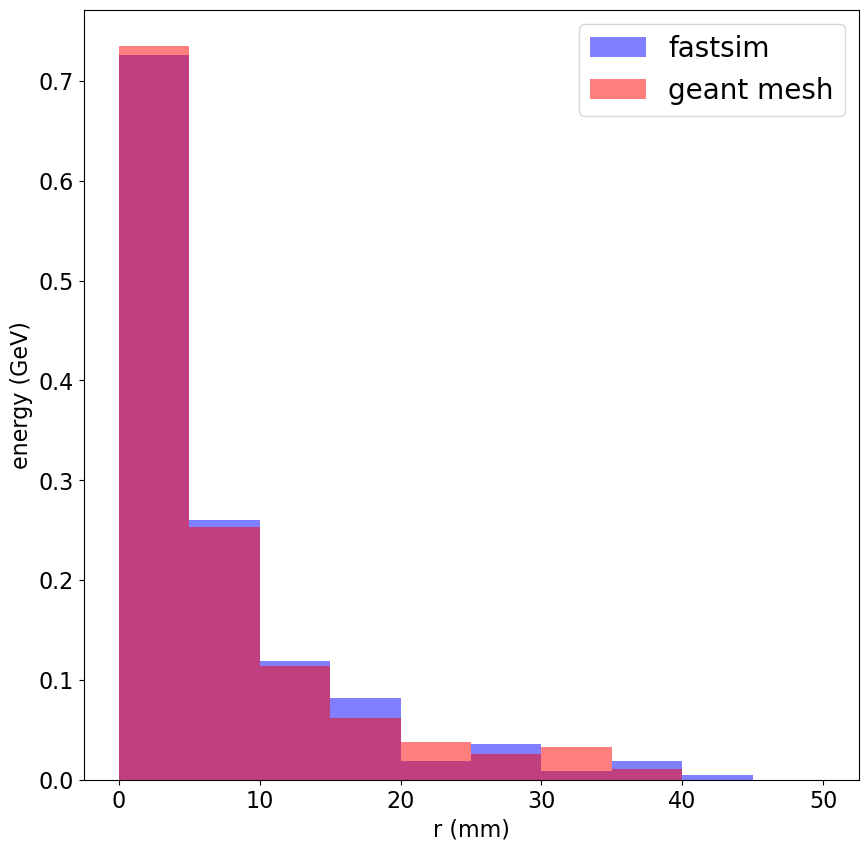

In [29]:
plt.figure(figsize=(10, 10))
plt.hist(r_pos_fast,bins = 10, weights=np.array(weight_energy_fast)/valid_fast,range=(0, 50), color = 'blue', alpha = 0.5, label ='fastsim')
plt.hist(r_pos_mesh,bins = 10, weights=np.array(weight_energy_mesh)/valid_mesh,range=(0, 50), color = 'red', alpha = 0.5, label = 'geant mesh')
plt.legend(fontsize = 20)
plt.xlabel("r (mm)", fontsize = 16)
plt.ylabel("energy (GeV)", fontsize = 16)
plt.tick_params(axis='both', which = 'major', labelsize = 16)
# plt.hist(r_pos,weights=weight_energy,range=(0, 40))
# log_energy_fast = np.log10(np.array(weight_energy_fast))+3
# log_energy_full = np.log10(np.array(weight_energy_full))+3
# plt.hist(log_energy_full,bins = 100, range=(-2, 2), color = 'blue', alpha = 0.5) # todo change to log
# plt.hist(log_energy_fast,bins = 100, range=(-2, 2), color = 'red', alpha = 0.5) # todo change to log
# plt.yscale('log')
plt.savefig('/home/cinyu/figs/fullfast_r_profile.png')
plt.show() 



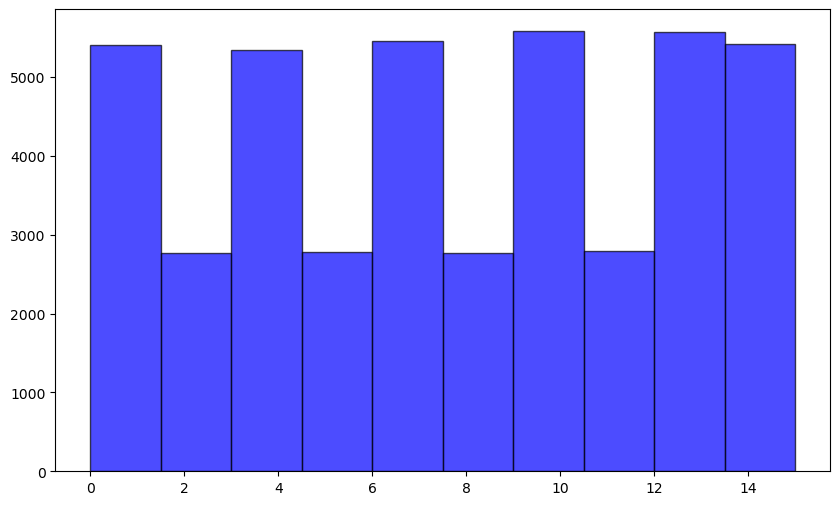

In [18]:
# print(energies)
plt.figure(figsize=(10, 6))
plt.hist(list, color='blue', alpha=0.7, edgecolor='black')
# plt.bar(cell_ids, energies, color='blue', alpha=0.7)
# plt.xlabel('Cell ID')
# plt.ylabel('Total Energy')
# plt.title('Energy Distribution in Cells')
# plt.grid(True)
plt.show() 

### convert into .h5 like shape: [nevent, rho, phi, z] 

### Event Loop

In [ ]:
def doEvtLoop(inputfiles,nbin,xmin,xmax,histtag,title):
    
    reader = Reader(inputfiles)
    hist = ROOT.TH1F(histtag,title,nbin,xmin,xmax)

    pxinitial = 0.
    Einitial = 250. # considering resonance here
    angle = 0.007 # crossing angle parameter, change as needed

    pxinitial = Einitial*angle
    Einitial = 2.*np.sqrt((Einitial/2.)**2 + (pxinitial/2.)**2)
        
    ecms = edm4hep.LorentzVectorE(pxinitial,0.,0.,Einitial)


    for i, event in enumerate(reader.get('events')):            
        
        ## HANDS-ON!!
        # We need to get the muon collection. 
        # Then we should put a cut: Take events with exactly TWO muons
        # Use edmp4hep utils p4: This will put mu1 and mu2 into 4-vector
 
        
        # recoil mass calculations
        recoil = ecms - (mu1 + mu2)
        hist.Fill(recoil.M())
        
    return hist



### Running over samples

In [ ]:
signalDir = '../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root'
bkgDir = '../data/bgk/E250-TDR_ws.P4f_zz_sl.Gwhizard-1_95.eL.pR.I106575.001.edm4hep.root'

sig_hist = doEvtLoop(signalDir,40,50.,250.,"signal","; mass [GeV]; ; ")
bkg_hist = doEvtLoop(bkgDir,40,50.,250.,"bkg", "; mass [GeV]; ; ")

runtime_error: void podio::ROOTReader::openFiles(const vector<string>& filenames) =>
    runtime_error: File ../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root couldn't be found

Error in <TFile::TFile>: file /home/cinyu/tutorials/edm4hep_analysis/../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root does not exist


### Draw via ROOT

In [ ]:
c1 = ROOT.TCanvas()
sig_hist.Draw()
hs = ROOT.THStack("hs","; mass [GeV]; ; ")
leg = ROOT.TLegend(0.5,0.6,0.9,0.9)
leg.SetHeader("ILC at 250 GeV")
sig_hist.SetFillColor(2)
leg.AddEntry(sig_hist, "Signal", "F")
bkg_hist.SetFillColor(4)
leg.AddEntry(bkg_hist, "Bkg.","F")
hs.Add(bkg_hist)
hs.Add(sig_hist)
hs.Draw()
leg.Draw()
c1.Draw()


NameError: name 'sig_hist' is not defined